In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

base_path = ''

In [2]:
df = pd.read_csv(base_path + 'df1018.csv')

In [3]:
df1 = pd.read_excel(base_path + 'gds1018 (1).xlsx')

In [4]:
df2 = pd.merge(df, df1)

In [5]:
df3 = df2.dropna()

In [6]:
df3

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류
9670,2021-07-04,101,대파1단,1,900,900,7,6,채소
9671,2021-07-04,101,대파1단,1,900,900,7,6,채소
9672,2021-07-04,101,대파1단,1,900,900,7,6,채소
9673,2021-07-04,101,대파1단,1,900,900,7,6,채소
9674,2021-07-04,101,대파1단,1,900,900,7,6,채소
...,...,...,...,...,...,...,...,...,...
18213552,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213553,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213554,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213555,2022-09-30,2599990000094,아이스크림바10개,3,3980,11940,9,4,냉동


In [7]:
data = df3.copy()
data

,SAL_DT,PLU_CD,GDS_NM,SALE_QTY,SALE_PRC,SALE_AMT,month,weekday,대분류
9670,2021-07-04,101,대파1단,1,900,900,7,6,채소
9671,2021-07-04,101,대파1단,1,900,900,7,6,채소
9672,2021-07-04,101,대파1단,1,900,900,7,6,채소
9673,2021-07-04,101,대파1단,1,900,900,7,6,채소
9674,2021-07-04,101,대파1단,1,900,900,7,6,채소
...,...,...,...,...,...,...,...,...,...
18213552,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213553,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213554,2022-09-30,2599990000094,아이스크림바10개,1,3980,3980,9,4,냉동
18213555,2022-09-30,2599990000094,아이스크림바10개,3,3980,11940,9,4,냉동


In [8]:
from sklearn.preprocessing import MinMaxScaler

# 두 가지 feature를 대상
data = df[['SALE_QTY', 'SALE_AMT']]

# 정규화 진행
scaler = MinMaxScaler()
data_scale = scaler.fit_transform(data)

In [9]:
from sklearn.cluster import KMeans

k = 3

# 그룹 수, random_state 설정
model = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model.fit(data_scale)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
df['cluster'] = model.fit_predict(data_scale)

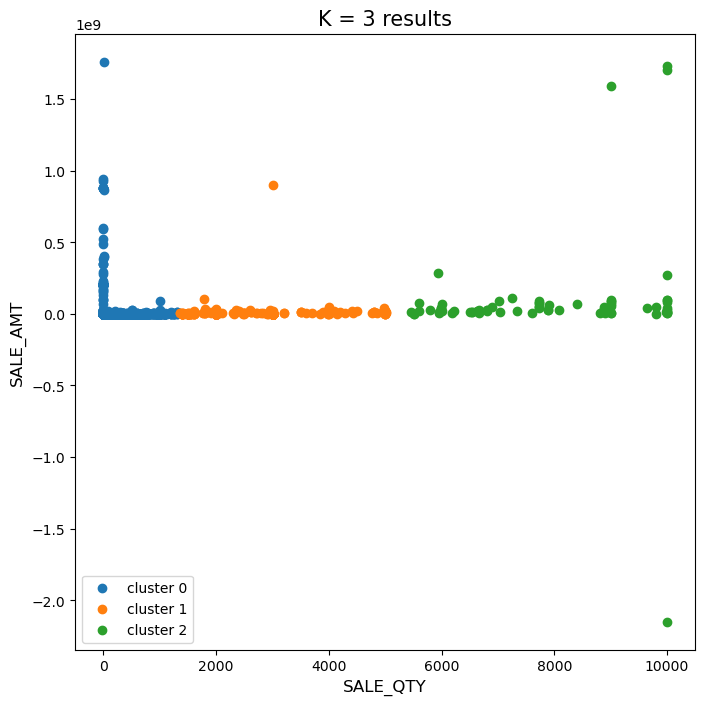

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(df.loc[df['cluster'] == i, 'SALE_QTY'], df.loc[df['cluster'] == i, 'SALE_AMT'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('SALE_QTY', size = 12)
plt.ylabel('SALE_AMT', size = 12)
plt.show()

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

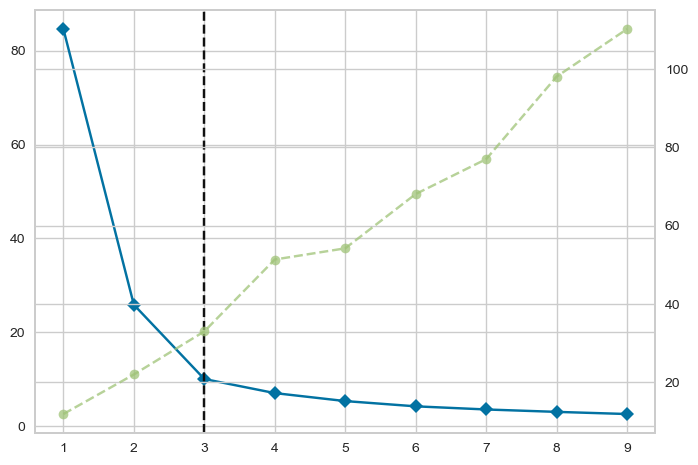

In [11]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(data_scale)